# PREDATOR: **PRED**icting the imp**A**ct of cancer somatic mu**T**ations on pr**O**tein-protein inte**R**actions


## OV


<b><i class="fa fa-folder-o" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Location</b><br>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">Predator\src</code>
</p>

<b><i class="far fa-file" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Name</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">PredatorStudy_OV.ipynb</code>
</p>

<b><i class="far fa-calendar-alt" area-hidden="true" style="color:#1976D2"> </i>&nbsp; Last Edited</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">June 17th, 2022</code>
</p>


<div class="alert alert-block" style="background-color: #F5F5F5; border: 1px solid; padding: 10px; border-color: #E0E0E0">
    <b><i class="fa fa-compass" aria-hidden="true" style="color:#404040"></i></b>&nbsp; <b style="color: #404040">Purpose </b> <br>
<div>
   
- [x] Apply on Cancer Datasets
    > OV
    
**Dependent files:**

* Target (Cancer) data: 
    - *OV_Interface.txt*

In [1]:
from pathlib import Path

from helpers.helpers_predator.displayers import (
    visualize_label_counts,
    display_data,
)

from helpers.helpers_predator.common import load_predator

# PATHS
OV_PATH = Path(r"../data/Elaspic_merged_results/OV_Interface_2021-11-17.txt")
PREDATOR_MODEL_PATH = Path(r"PredatorModels/PredatorModel_2022-06-16/cc84a54e/predator.pkl")
PREDICTIONS_DATASETS_FOLDER_PATH = "../data/predictions_datasets/"

# Reflect changes in the modules immediately.
%load_ext autoreload
%autoreload 2

## Load the Predator

In [2]:
predator = load_predator(PREDATOR_MODEL_PATH)

2022-06-17 09:37:05 | INFO     | helpers.helpers_predator.common | Predator object PredatorModels\PredatorModel_2022-06-16\cc84a54e\predator.pkl is loaded successfully.


## Prediction TCGA on Cancer Dataset: OV

In [3]:
predator.initialize_target_data_materials(
    tcga_code_path_pairs=[('ov', OV_PATH)]
)

2022-06-17 09:37:05 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `ov` ..
2022-06-17 09:37:05 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_ov_data` ..
2022-06-17 09:37:05 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2022-06-17 09:37:05 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['EL2_score', 'Provean_score', 'Final_ddG', 'Interactor_alignment_score', 'Matrix_score', 'Solvent_accessibility_wt', 'van_der_waals_mut', 'Solvent_accessibility_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt']
2022-06-17 09:37:05 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_ov data materials  ..


#### TCGA Cancer Datasets

##### OV

In [4]:
display_data(predator.data_materials["ov"])

Data dimensions: (5092, 103)


,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,Domain_clan,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,Ras,...,388.0,53.3423,55.3148,37.8150,37.8150,719.095,461.785,1180.88,3.18062,3.18062
1,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,Ras,...,344.0,62.3140,63.0691,32.5038,32.5038,598.71,417.74,1016.46,3.80414,3.80414
2,P62993,P62993,A3V,done,interface,-,-,-,SH3_1,SH3_1,...,280.0,23.2774,24.5177,122.5120,122.5120,170.81,120.515,291.325,4.63364,4.63364


#### Preprocessed TCGA Cancer Datasets

##### OV

In [5]:
display_data(predator.data_materials["target_ov_data"])

Data dimensions: (5092, 61)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,ProteinSolver_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P08134,D59E,P52565,0.9263,0.915529,0.9394,0.914711,1.492640,0.999329,0.046801,...,388.0,53.3423,55.3148,37.8150,37.8150,719.095,461.785,1180.880,3.18062,3.18062
1,P08134,D59E,P52565-2,0.9263,0.915529,0.7222,0.708487,0.762694,0.999029,0.004062,...,344.0,62.3140,63.0691,32.5038,32.5038,598.710,417.740,1016.460,3.80414,3.80414
2,P62993,A3V,Q9H8V3-2,0.4444,0.463595,0.2792,0.262235,1.964490,-0.080548,0.456549,...,280.0,23.2774,24.5177,122.5120,122.5120,170.810,120.515,291.325,4.63364,4.63364


### Voting mode: `soft`

In [6]:
predator.initialize_target_data_materials(
    tcga_code_path_pairs=[('ov', OV_PATH)]
)

2022-06-17 09:37:10 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `ov` ..
2022-06-17 09:37:10 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_ov_data` ..
2022-06-17 09:37:10 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2022-06-17 09:37:10 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['EL2_score', 'Provean_score', 'Final_ddG', 'Interactor_alignment_score', 'Matrix_score', 'Solvent_accessibility_wt', 'van_der_waals_mut', 'Solvent_accessibility_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt']
2022-06-17 09:37:10 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_ov data materials  ..


In [7]:
predator.predict(voting='soft')

2022-06-17 09:37:11 | DEBUG    | Predator | Predicting on cancer datasets ..
2022-06-17 09:37:11 | DEBUG    | helpers.helpers_predator.models | Initializing EnsambledVotingClassifier.
2022-06-17 09:37:11 | DEBUG    | helpers.helpers_predator.models | Voting mode: soft
2022-06-17 09:37:11 | DEBUG    | helpers.helpers_predator.predictions | Initializing: PredictionsSoft
2022-06-17 09:37:11 | DEBUG    | Predator | Predicting on ov cohort ..
2022-06-17 09:37:11 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=380, random_state=3279)
2022-06-17 09:37:11 | DEBUG    | helpers.helpers_predator.models | X shape: (5092, 10)
2022-06-17 09:37:11 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=90,
                    

In [8]:
predator.predictions.keys()

dict_keys(['ov_prob'])

In [9]:
# Predictions for first 3 experiment.
predator.predictions["ov_prob"][:3]

[array([[0.28209005, 0.71790995],
        [0.33823585, 0.66176415],
        [0.38815943, 0.61184057],
        ...,
        [0.44920687, 0.55079313],
        [0.39674034, 0.60325966],
        [0.50038391, 0.49961609]]),
 array([[0.38616309, 0.61383691],
        [0.42687749, 0.57312251],
        [0.53770352, 0.46229648],
        ...,
        [0.5679117 , 0.4320883 ],
        [0.6072733 , 0.3927267 ],
        [0.60030246, 0.39969754]]),
 array([[0.29543374, 0.70456626],
        [0.29721107, 0.70278893],
        [0.39141747, 0.60858253],
        ...,
        [0.23274409, 0.76725591],
        [0.32397903, 0.67602097],
        [0.25674108, 0.74325892]])]

#### Predictions Post Processing

Post processing of predictions involves following steps:

##### 1. Merging Predictions with SNV Data

The prediction column is merged with SNV data for each experiment.

$\text{For each experiment } n: $

$$
  \textit{(Prediction Merged Data)}_n = \underbrace{[\textit{Predictions}_n]}_\text{Probs Percentages} + 
      \underbrace{[\textit{Protein }] [\textit{Mutation }] [\textit{Interactor }]}_\text{Cancer Data Triplets} + \underbrace{[\textit{Features }] }_\text{Elaspic}
$$


##### 2. Convert to 1-isomer: `Interactor_UniProt_ID`

$\textit{Interactor_UniProt_ID}$ column contains isomer proteins. Here, we convert them into primary isoform representation (i.e. without dashes).

| Interactor_UniProt_ID |
--------------
| P38936     |
| P16473     |
| P16473-2   |
| P19793     |

##### 3. Dropping Invalid Predictions

Entries whose predicted class-1 probability lies in both `Decreasing` and `Increasing+NoEff` are dropped.

Due to having different features for the same $\textit{(protein, mutation, interactor)}$ triplet from ELASPIC, the triplet $\textit{(protein, mutation, interactor)}$ may contain class-1 probability prediction of both lower than 0.50 and higher than 50. We drop such instances.

In [10]:
predator.predictions_post_process()

2022-06-17 09:37:26 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2022-06-17 09:37:26 | DEBUG    | helpers.helpers_predator.predictions | Post processing predictions for cohort ov ..
2022-06-17 09:37:26 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2022-06-17 09:37:26 | DEBUG    | helpers.helpers_predator.predictions | Merging predictions with ov cancer dataset ..
2022-06-17 09:37:26 | DEBUG    | helpers.helpers_predator.predictions | Handling valid and invalid entries ..


  0%|          | 0/38 [00:00<?, ?it/s]

2022-06-17 09:37:47 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 555): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.491448  P07332    N695H     P08581
1    0.673250  P07332    N695H     P08581
2    0.492252  Q9Y6Q5    R251C     Q9BXS5
3    0.535160  Q9Y6Q5    R251C     Q9BXS5
4    0.653860  Q14814     K31T     Q02078
2022-06-17 09:38:08 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 419): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.518245  Q14814     K31T     Q02078
1    0.612455  Q14814     K31T     Q06413
2    0.612455  Q14814     K31T     Q06413
3    0.612455  Q14814     K31T     Q06413
4    0.612455  Q14814     K31T     Q06413
2022-06-17 09:38:33 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 649): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.363358  Q9Y6Q5    R251C     Q9BXS5
1    0.531921  Q9Y6Q5    R251C     Q9BXS5
2    0.

In [11]:
predator.predictions.keys()

dict_keys(['ov_prob', 'ov_predicted_probs_datasets', 'ov_predicted_valid_datasets', 'ov_predicted_invalid_datasets', 'ov_finalized_prediction_dataframes'])

In [12]:
display_data(predator.predictions["ov_predicted_probs_datasets"][0])

Data dimensions: (5092, 104)


,Prediction,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0.717910,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,...,388.0,53.3423,55.3148,37.8150,37.8150,719.095,461.785,1180.88,3.18062,3.18062
1,0.661764,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,...,344.0,62.3140,63.0691,32.5038,32.5038,598.71,417.74,1016.46,3.80414,3.80414
2,0.611841,P62993,P62993,A3V,done,interface,-,-,-,SH3_1,...,280.0,23.2774,24.5177,122.5120,122.5120,170.81,120.515,291.325,4.63364,4.63364


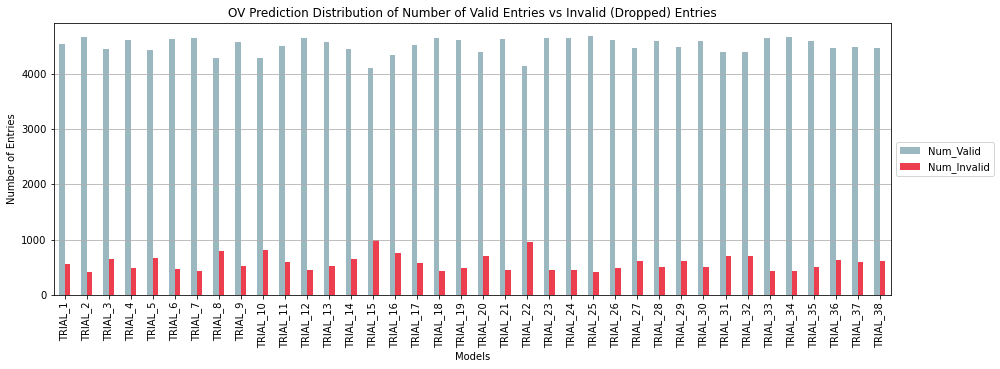

In [13]:
predator.predictions.plot_distribution_valid_vs_invalid("ov")

2022-06-17 10:07:34 | DEBUG    | helpers.helpers_predator.predictions | Plotting number of finalized predictions per model.
Note that following plot shows the number of (protein, mutation, interactor) triplets which had valid prediction.


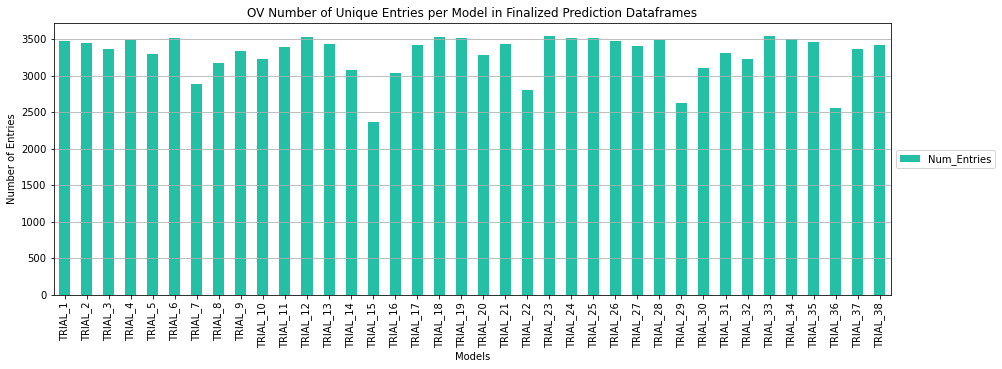

In [14]:
predator.predictions.plot_num_finalized_predictions("ov")

In [15]:
display_data(predator.predictions['ov_finalized_prediction_dataframes'][0])

Data dimensions: (3477, 4)


,Prediction,UniProt_ID,Mutation,Interactor_UniProt_ID
0,0.717910,P08134,D59E,P52565
1,0.661764,P08134,D59E,P52565
2,0.611841,P62993,A3V,Q9H8V3


In [16]:
predator.prepare_ensemble_prediction_data()

2022-06-17 10:07:37 | INFO     | helpers.helpers_predator.predictions | PredictionsSoft
2022-06-17 10:07:37 | INFO     | helpers.helpers_predator.predictions | Preparing ensemble prediction data for ov taking median ..


  0%|          | 0/38 [00:00<?, ?it/s]

2022-06-17 10:11:44 | DEBUG    | helpers.helpers_predator.predictions | Prediction probabilities data for ov is prepared.
Accessible from `ov_predictions_prob_data`.
2022-06-17 10:11:44 | DEBUG    | helpers.helpers_predator.predictions | Ensemble prediction data for ov is prepared.
Accessible from `ov_ensemble_prediction_data`.
2022-06-17 10:11:44 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data is available for ov.
Accessible from predictions.['ov_prediction_results']
2022-06-17 10:11:44 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data (no_votes dropped) is available for ov.
Accessible from predictions.['ov_prediction_results_no_votes_dropped']


In [17]:
display_data(predator.predictions['ov_predictions_prob_data'])

Data dimensions: (2582, 40)


,Trial 0,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Trial 6,Trial 7,Trial 8,Trial 9,...,Trial 30,Trial 31,Trial 32,Trial 33,Trial 34,Trial 35,Trial 36,Trial 37,PROB_1s_AVG,VOTED_PREDICTION
0,0.689837,0.59348,0.703678,0.657622,0.669327,0.680967,0.34517,0.847257,0.594675,0.807849,...,0.914072,0.821777,0.740711,0.743697,0.836938,0.934375,0.629593,0.701267,0.7422,1
1,0.611841,0.462296,0.608583,0.531374,0.669779,0.518195,0.474314,0.814617,0.516344,0.695191,...,0.555554,0.610511,0.474815,0.526471,0.669051,0.166667,0.571876,0.62546,0.57144,1
2,0.490572,0.403711,0.600442,0.460101,0.637425,0.414457,0.557137,0.715715,0.415513,0.629651,...,0.456681,0.70364,0.463691,0.429412,0.561114,0.166667,0.503542,0.581567,0.51163,1


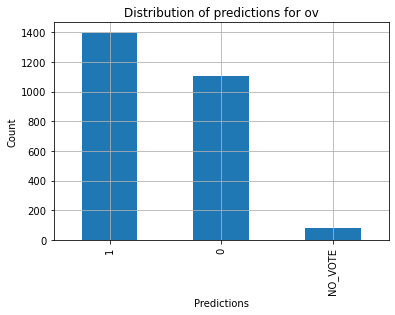

In [18]:
predator.predictions.plot_ensemble_prediction_distribution("ov")

In [19]:
ov_prediction_results_soft = predator.predictions['ov_prediction_results']
display_data(ov_prediction_results_soft)

Data dimensions: (2582, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P08134,D59E,P52565,1
1,P62993,A3V,Q9H8V3,1
2,P62993,A3V,Q14155,1


In [20]:
ov_prediction_results_soft_no_votes_dropped = predator.predictions["ov_prediction_results_no_votes_dropped"]
display_data(ov_prediction_results_soft_no_votes_dropped)

Data dimensions: (2501, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P08134,D59E,P52565,1
1,P62993,A3V,Q9H8V3,1
2,P62993,A3V,Q14155,1


Label counts:
Increasing + No Effect    1104
Disrupting                1397
Name: Prediction, dtype: int64


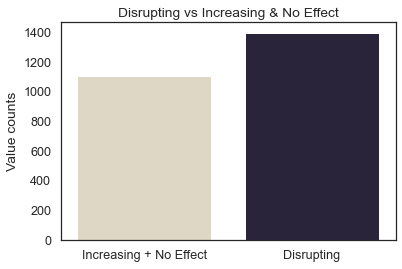

In [21]:
visualize_label_counts(ov_prediction_results_soft_no_votes_dropped, 'Prediction')

In [22]:
ov_ensemble_prediction_data_soft = predator.predictions["ov_ensemble_prediction_data"]

In [23]:
ov_predictions_prob_data_soft = predator.predictions["ov_predictions_prob_data"]

In [24]:
def add_median_probabilities(prediction_results, predictions_prob_data):
    assert len(prediction_results) == len(predictions_prob_data)
    prediction_results_with_probabilities = prediction_results.copy()
    prediction_results_with_probabilities["Median_Probability"] = predictions_prob_data["PROB_1s_AVG"]
    return prediction_results_with_probabilities

In [25]:
ov_prediction_results_soft_with_median_probs = add_median_probabilities(
    prediction_results=predator.predictions["ov_prediction_results"],
    predictions_prob_data=predator.predictions["ov_predictions_prob_data"]
)
ov_prediction_results_soft_with_median_probs.head()

,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability
0,P08134,D59E,P52565,1,0.7422
1,P62993,A3V,Q9H8V3,1,0.57144
2,P62993,A3V,Q14155,1,0.51163
3,O75175,Q684H,Q9NZN8,1,0.67857
4,O75175,Q684H,B2RDX7,1,0.67556


In [26]:
ov_prediction_results_soft_no_votes_dropped_with_median_probabilities = ov_prediction_results_soft_with_median_probs[
    ov_prediction_results_soft_with_median_probs['Prediction'].isin([0, 1])
]

In [27]:
len(ov_prediction_results_soft_no_votes_dropped_with_median_probabilities)

2501

## Exporting Predictions

In [28]:
# ov_prediction_results = ov_prediction_results_hard_no_votes_dropped
# ov_prediction_results = ov_prediction_results_soft_no_votes_dropped
ov_prediction_results = ov_prediction_results_soft_no_votes_dropped_with_median_probabilities
display_data(ov_prediction_results)

Data dimensions: (2501, 5)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability
0,P08134,D59E,P52565,1,0.7422
1,P62993,A3V,Q9H8V3,1,0.57144
2,P62993,A3V,Q14155,1,0.51163


In [29]:
predator.export_prediction(
    tcga="ov",
    data=ov_prediction_results,
    file_name="predictions",
    folder_path=PREDICTIONS_DATASETS_FOLDER_PATH,
    voting="soft",
    overwrite=False,
    file_extension='csv'
)

2022-06-17 10:15:07 | DEBUG    | helpers.helpers_predator.common | Folder with ID 865d1897 is created.
2022-06-17 10:15:07 | DEBUG    | helpers.helpers_predator.common | Exporting data predictions at location ../data/predictions_datasets/ in folder ov_prediction_2022-06-17\865d1897..
2022-06-17 10:15:07 | INFO     | helpers.helpers_predator.common | ../data/predictions_datasets/ov_prediction_2022-06-17\865d1897\predictions_soft_2022-06-17.csv is exported successfully.
2022-06-17 10:15:07 | INFO     | helpers.helpers_predator.common | Config is exported.


---